<a href="https://colab.research.google.com/github/mesha4545a/Regressed-Classification-Project-/blob/main/ML_Weekend_Project_Room11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing needed libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import *
sns.set_palette('Set2')

#**Importing Data**

In [ ]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

training["target"] = training["target"].apply(lambda x: x.strip())
test["target"] = test["target"].apply(lambda x: x.strip()[:-1])




#**EDA**

###**Data Understanding**

####Gathering information about the dataset

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   ooccupation     32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  target          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


####Dataset Shape

In [ ]:
training.shape

(32561, 14)

####Describing Categorical Data

In [ ]:
 training.describe(exclude='number')

,workclass,education,marital_status,ooccupation,relationship,sex,native_country,target
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,21790,29170,24720


####Viewing some basic statistical details‏

In [ ]:
 training.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


####Checking Null Values

In [ ]:
training.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

####Value Count of All Categorical Data

#####workclass

In [ ]:
training.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

#####education

In [ ]:
training.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

#####marital_status

In [ ]:
training.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

#####ooccupation

In [ ]:
training.ooccupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: ooccupation, dtype: int64

#####relationship

In [ ]:
training.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

#####sex

In [ ]:
training.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

#####native_country

In [ ]:
training.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#####target

In [ ]:
training.target.value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

###**Data Visualization**

Training Dataset Pair Plot Chart

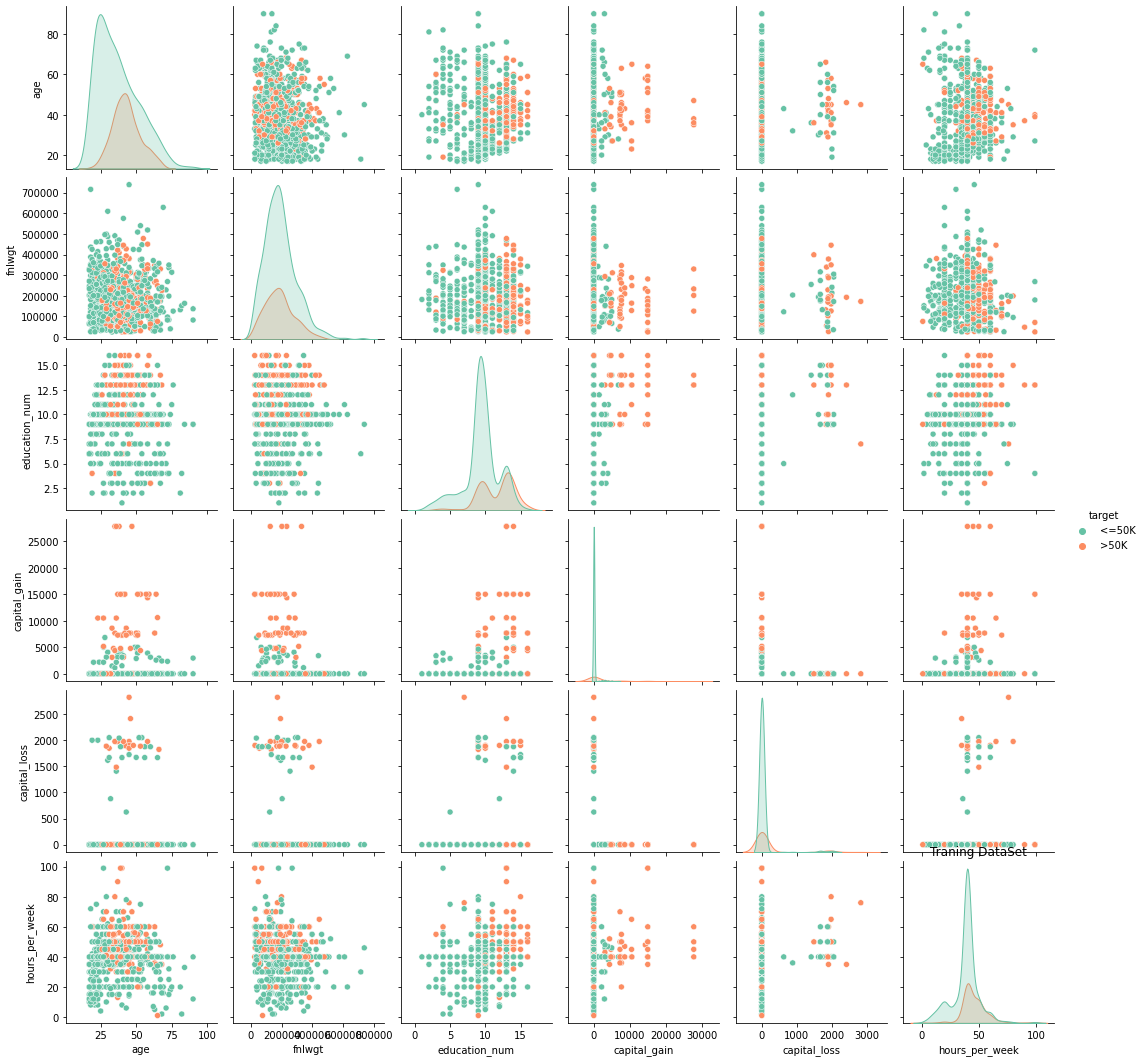

In [ ]:
sns.pairplot(training.sample(1000), hue='target')
plt.title('Traning DataSet')
plt.show()

- Plotting pairwise relationships in the training dataset
- With excluding the ‘target’ (income) as a hue

Differentiations of Income Based on Gender

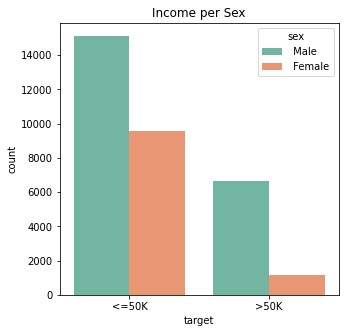

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.countplot(data=training, x='target', hue='sex')
plt.title('Income per Sex')
plt.show()

As it’s shown in the chart,
- The majority of the workers are males, and they are representing the majority of both income’s categories.
- The majority of the workers (and the most of the females), are getting an income for <=50 a year.

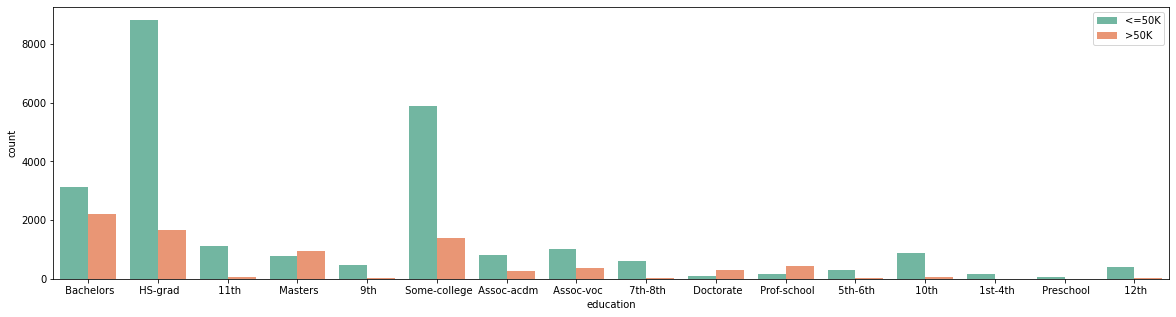

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(data=training,x='education',hue='target')
plt.legend(loc='upper right')
plt.show()

Relationship between Income and Working-hours

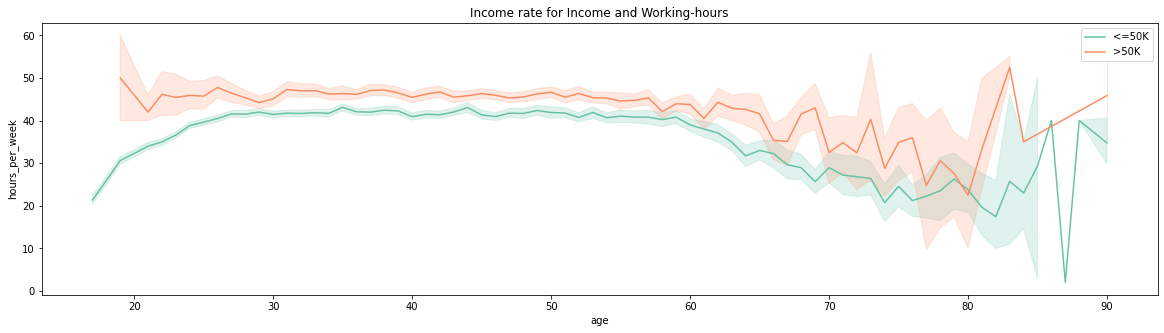

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.lineplot(x="age", y="hours_per_week",hue="target", data=training)

plt.title('Income rate for Income and Working-hours')
plt.legend(loc='upper right')
plt.show()

**There are many insights can be found in this chart such as:**
- More working-hours = more income 
- Workers with high income work more than 40hrs a week, and they start to work fewer hours at the age of 60. Also, less-income-workers work less than 40hrs a week.
- Something strange about the workers, regarding how they are working for longer hours in their 80’s than they start-working ages, and even longer than the hours of the less-income-workers as well. 

Relationship between Income and Workers’ Occupation

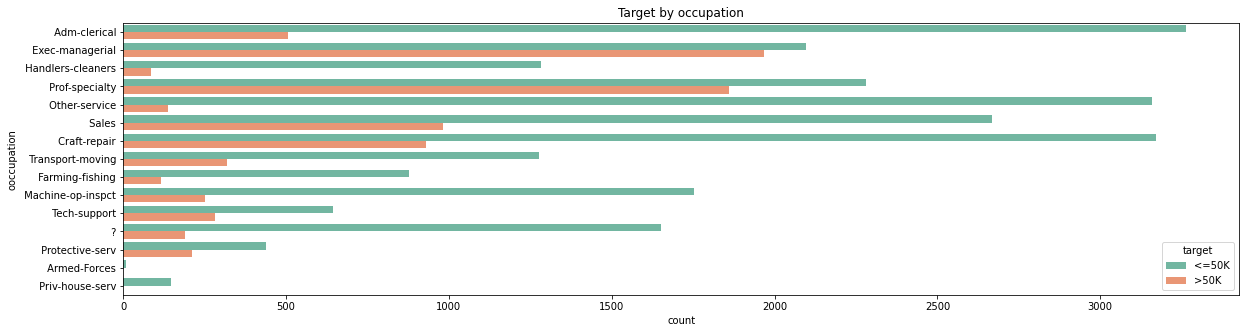

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='ooccupation',hue='target',data=training)
plt.title("Target by occupation")
plt.show()

**The clearest insights that can be seen from this chart are:**

- Eexec-managerial and Prof-specialty workers are usually having a high income.
- Adm-clerical, craft-repair, other-service workers are usually having less income.
- Haigh armed forces and priv-house-serv workers are usually having the lowest income among all the other workers.

High Income by Occupation

First we get the dummy of target column

In [ ]:
target_d=pd.get_dummies(training.target)


In [ ]:
target_d

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
32556,1,0
32557,0,1
32558,1,0
32559,1,0


Then we add it to a new dataframe so we can get the pivot table

In [ ]:
df=pd.DataFrame(training)
df['<=50K']=target_d['<=50K']
df['>50K']=target_d['>50K']

In [ ]:
col=['<=50K','>50K']
training.drop(columns=col,axis=1,inplace=True)

We create the pivot table

In [ ]:
dfpO=df.pivot_table(index='ooccupation',aggfunc='mean',values=['<=50K','>50K'])
dfpO

,<=50K,>50K
ooccupation,,
?,0.896365,0.103635
Adm-clerical,0.865517,0.134483
Armed-Forces,0.888889,0.111111
Craft-repair,0.773359,0.226641
Exec-managerial,0.515986,0.484014
Farming-fishing,0.884306,0.115694
Handlers-cleaners,0.937226,0.062774
Machine-op-inspct,0.875125,0.124875
Other-service,0.958422,0.041578


In [ ]:
sorted_m50kO=dfpO.sort_values(['>50K'],ascending=False).index
sorted_m50kO

Index([' Exec-managerial', ' Prof-specialty', ' Protective-serv',
       ' Tech-support', ' Sales', ' Craft-repair', ' Transport-moving',
       ' Adm-clerical', ' Machine-op-inspct', ' Farming-fishing',
       ' Armed-Forces', ' ?', ' Handlers-cleaners', ' Other-service',
       ' Priv-house-serv'],
      dtype='object', name='ooccupation')

In [ ]:
sorted_l50kO=dfpO.sort_values(['<=50K'],ascending=False).index
sorted_l50kO

Index([' Priv-house-serv', ' Other-service', ' Handlers-cleaners', ' ?',
       ' Armed-Forces', ' Farming-fishing', ' Machine-op-inspct',
       ' Adm-clerical', ' Transport-moving', ' Craft-repair', ' Sales',
       ' Tech-support', ' Protective-serv', ' Prof-specialty',
       ' Exec-managerial'],
      dtype='object', name='ooccupation')

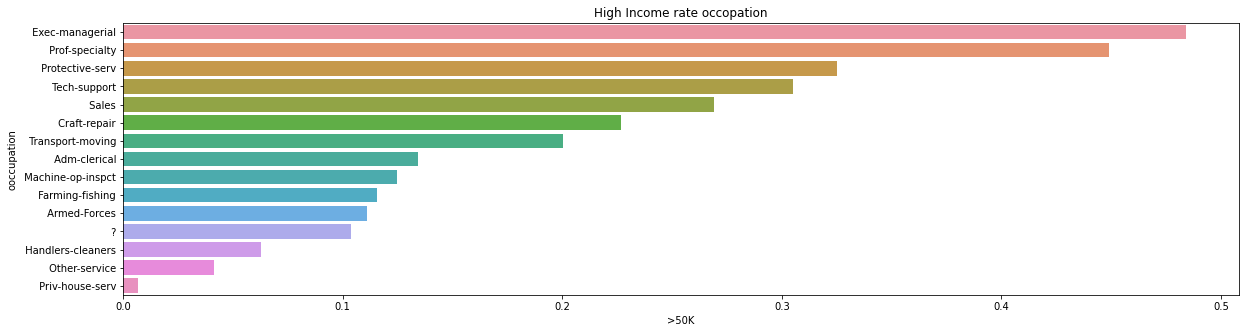

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.barplot(y=dfpO.index,x=dfpO['>50K'], order=sorted_m50kO)
plt.title('High Income rate occopation')
plt.show()

- Eexec-managerial and Prof-specialty workers are usually having a high income 

Low Income rate per occpoation

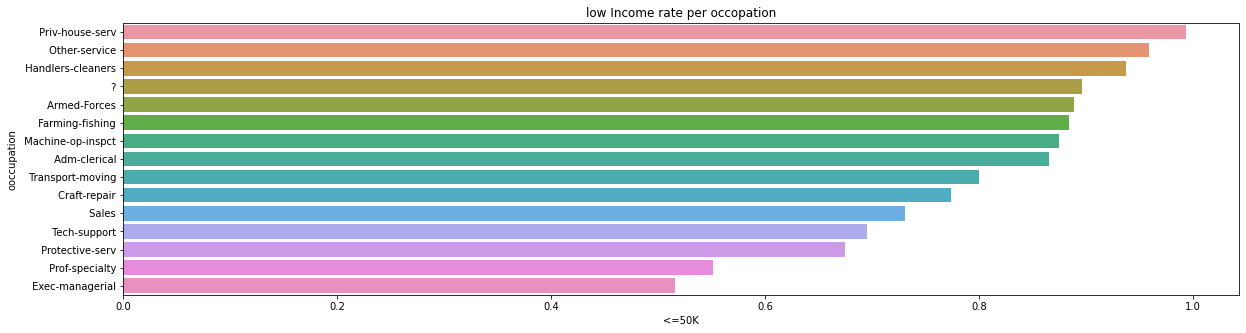

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.barplot(y=dfpO.index,x=dfpO['<=50K'], order=sorted_l50kO)
plt.title('low Income rate per occopation')
plt.show()

- Adm-clerical, craft-repair, other-service workers are usually having less income.
- Haigh armed forces and priv-house-serv workers are usually having the lowest income among all the other workers

How Income is effected by the education level

We create a pivot table

In [ ]:
dfp=df.pivot_table(index='education',aggfunc='mean',values=['<=50K','>50K'])

In [ ]:
dfp

,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


We should sort values for good visualization

In [ ]:
sorted_m50k=dfp.sort_values(['>50K'],ascending=False).index
sorted_m50k

Index([' Doctorate', ' Prof-school', ' Masters', ' Bachelors', ' Assoc-voc',
       ' Assoc-acdm', ' Some-college', ' HS-grad', ' 12th', ' 10th',
       ' 7th-8th', ' 9th', ' 11th', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object', name='education')

Here we visualize the High income rate per education level.

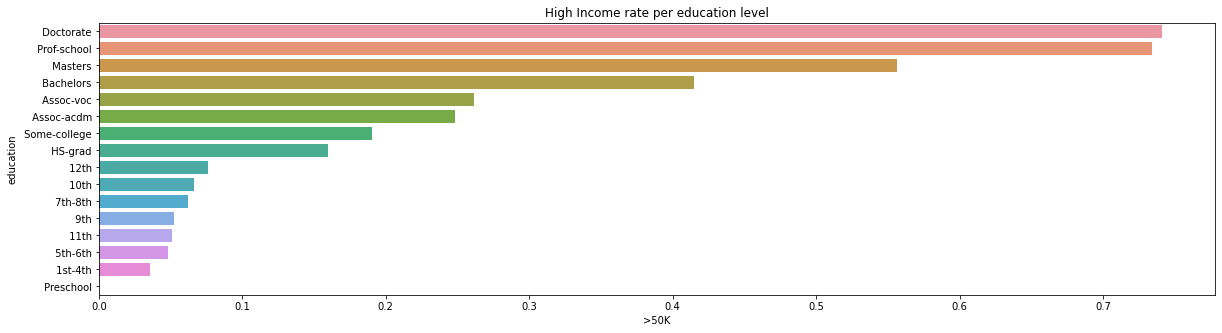

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.barplot(y=dfp.index,x=dfp['>50K'], order=sorted_m50k)
plt.title('High Income rate per education level')
plt.show()

In the above chart you can see what education level have the highest probability to have high income (more than 50K $)

We do the same process to get result of low income rate

In [ ]:
sorted_l50k=dfp.sort_values(['<=50K'],ascending=False).index
sorted_l50k

Index([' Preschool', ' 1st-4th', ' 5th-6th', ' 11th', ' 9th', ' 7th-8th',
       ' 10th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-acdm',
       ' Assoc-voc', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'],
      dtype='object', name='education')

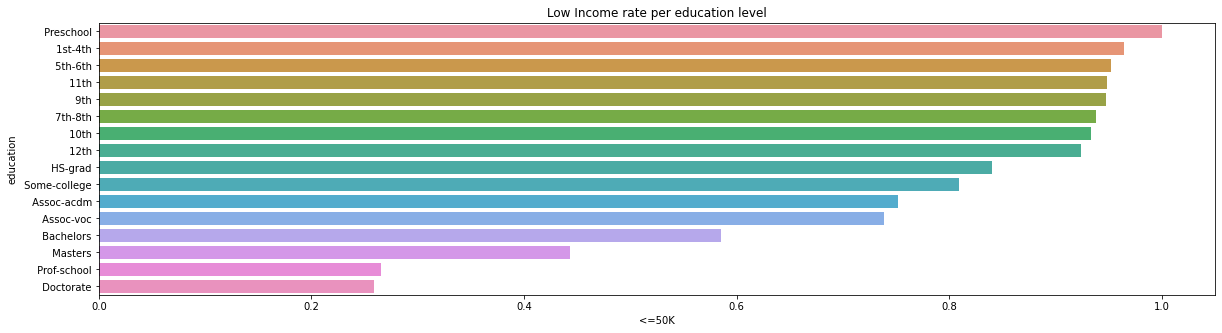

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.barplot(y=dfp.index,x=dfp['<=50K'], order=sorted_l50k)
plt.title('Low Income rate per education level')
plt.show()

It is obvious in the above chart that as people have low level of education they are most likely to have low income rate (less than 50K $)

Income relatiionship with Capital Gain and Capital Loss

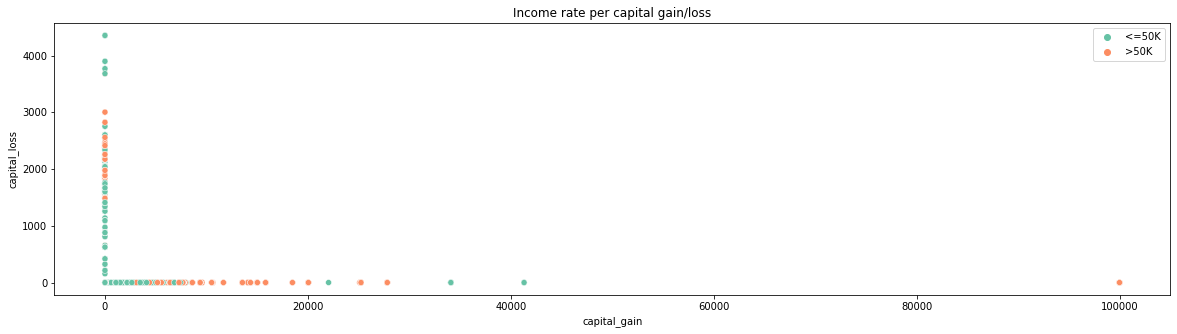

In [ ]:
fig=plt.figure(figsize=(20,5))

sns.scatterplot(data=training, x='capital_gain',y='capital_loss',hue='target')

plt.title('Income rate per capital gain/loss')
plt.legend(loc='upper right')
plt.show()

There are some interesting points regarding this chart:
- Some of people who making only capital loss have high income!
- There are people who have a huge capital gain with more than 30,000 $ and still considered as they have few income in the dataset. That is not consist and not logic.
- It is noticable that there is an outlier in the capital gain so we will check for all outliers

Is there any outlier?

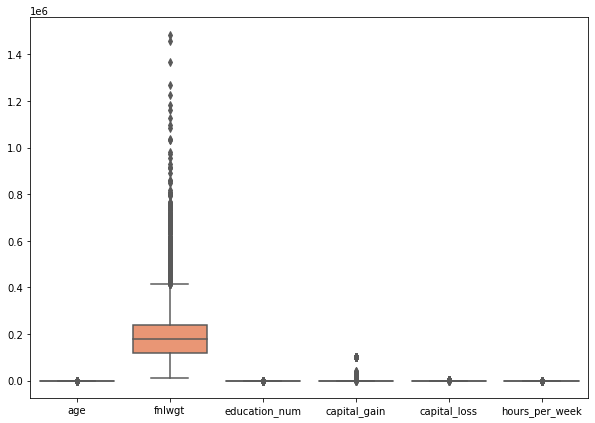

In [ ]:
fig=plt.figure(figsize=(10,7))
sns.boxplot(data=training)
plt.show()

As seen, "fnlwgt" and "capital_gain" features have outliers and we should remove them in the next stage (Data Preperation)

#**Data Preperation**

###**Data Cleansing**

####**Removing outliers**

In [ ]:
training=training[(training['fnlwgt']<training['fnlwgt'].quantile(.95))&(training['capital_gain']<training['capital_gain'].quantile(.95))]

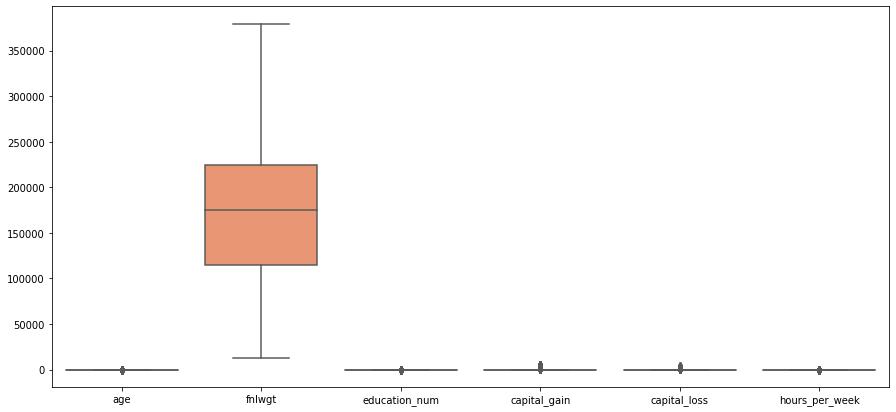

In [ ]:
fig=plt.figure(figsize=(15,7))
sns.boxplot(data=training)
plt.show()

In [ ]:
training.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

####**Removing inconsistent‏ features**


We have inconsistent‏ data from three features. These are :
- "Workclass"
- "ooccupation"
- "Native_country"


In [ ]:
training=training[training['workclass']!=' ?']
training=training[training['ooccupation']!=' ?']
training=training[(training['native_country']!=' ?') & (training['native_country']!= ' Holand-Netherlands' )]

now we check the data are they removed or not?

In [ ]:
training.native_country.value_counts()

 United-States                 24810
 Mexico                          469
 Philippines                     177
 Germany                         114
 Puerto-Rico                     101
 Canada                           95
 India                            92
 Cuba                             87
 El-Salvador                      82
 England                          77
 Jamaica                          76
 South                            68
 Dominican-Republic               66
 China                            65
 Italy                            62
 Vietnam                          61
 Poland                           53
 Columbia                         52
 Japan                            51
 Guatemala                        48
 Haiti                            42
 Taiwan                           39
 Iran                             35
 Portugal                         34
 Nicaragua                        28
 Ecuador                          26
 Greece                           26
 

####**Replacing the Target values to (1,0)**

In [ ]:
training["target"] = training["target"].replace(['<=50K','>50K'],(1,0))
test["target"] = test["target"].replace(['<=50K','>50K'],(1,0))

####**Cleaning the Test dataset to fit it into the model**

#####**Explorating Data**

In [ ]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [ ]:
test.workclass.value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [ ]:
test.ooccupation.value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: ooccupation, dtype: int64

In [ ]:
test.native_country.value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Japan                            30
 Portugal                         30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Nicaragua                        15
 

#####**Removing outliers**

In [ ]:
test=test[(test['fnlwgt']<test['fnlwgt'].quantile(.95))&(test['capital_gain']<test['capital_gain'].quantile(.95))]

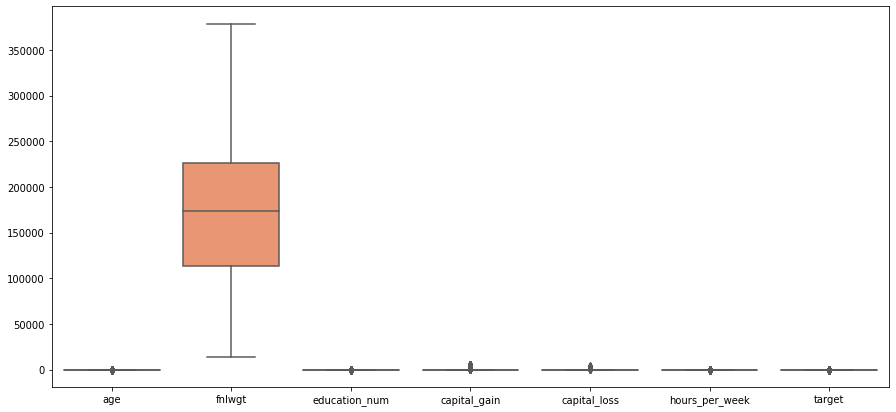

In [ ]:
fig=plt.figure(figsize=(15,7))
sns.boxplot(data=test)
plt.show()

In [ ]:
training.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

#####**Removing inconsistent‏ features**


We have inconsistent‏ data from three features. These are :
- "Workclass"
- "ooccupation"
- "Native_country"


In [ ]:
test=test[test['workclass']!=' ?']
test=test[test['ooccupation']!=' ?']
test=test[(test['native_country']!=' ?') & (test['native_country']!= ' Holand-Netherlands' )]

now we check the data are they removed or not?

In [ ]:
test.native_country.value_counts()

 United-States                 12433
 Mexico                          231
 Philippines                      90
 Puerto-Rico                      62
 Germany                          56
 Canada                           52
 India                            43
 China                            41
 El-Salvador                      40
 Cuba                             39
 Italy                            30
 South                            29
 England                          29
 Dominican-Republic               29
 Columbia                         26
 Japan                            25
 Haiti                            25
 Poland                           25
 Portugal                         25
 Jamaica                          23
 Vietnam                          19
 Guatemala                        19
 Greece                           18
 Ecuador                          16
 Iran                             14
 Peru                             13
 Nicaragua                        12
 

###**Features Extraction**

We will add two features as we believe that will increase model scores

Adding a new feature - Age Category

In [ ]:
training.loc[training['age']<=35,'Age Category']='young'
training.loc[(training['age']>35) & (training['age']<=60),'Age Category']='mature'
training.loc[training['age']>60,'Age Category']='old'

In [ ]:
training.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target,Age Category
12924,37,Private,48093,Bachelors,13,Never-married,Craft-repair,Not-in-family,Male,0,0,90,United-States,0,mature
22369,32,State-gov,111363,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,75,United-States,0,young
20541,52,Private,195635,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,2051,38,United-States,1,mature
11880,26,Private,97698,Masters,14,Never-married,Exec-managerial,Not-in-family,Male,0,0,32,United-States,1,young
21720,42,Private,109067,Bachelors,13,Separated,Tech-support,Not-in-family,Male,0,0,40,United-States,1,mature


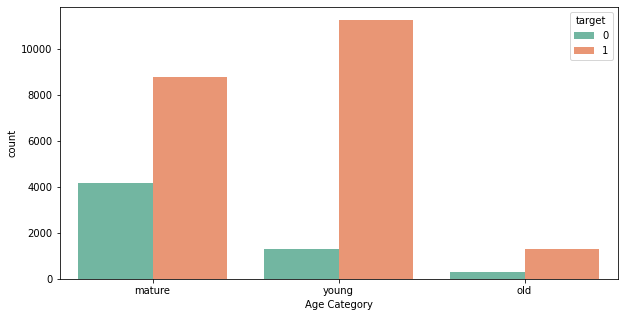

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=training,x='Age Category',hue='target')
plt.show()

As seen in the previous chart, young people are more likely to have low income. That is sence as usually people at the begining of their lives focus more on studying rather than having a job.

In addition, it seems there is a correlation between our new feature and the target and that might increase the model score

Adding a new feature - Education Category

In [ ]:
training.loc[(training['education']==' 1st-4th')|
             (training['education']==' 5th-6th')|
             (training['education']==' 7th-8th')|
             (training['education']==' 9th')|
             (training['education']==' 10th')|
             (training['education']==' 11th')|
             (training['education']==' 12th')|
             (training['education']==' HS-grad')|
             (training['education']==' Preschool'),'Education Category']='general education'

training.loc[(training['education']==' Bachelors')|
             (training['education']==' Assoc-acdm')|
             (training['education']==' Assoc-voc')|
             (training['education']==' Some-college'),'Education Category']='undergraduate'



training.loc[(training['education']==' Masters')|
             (training['education']==' Prof-school')|
             (training['education']==' Doctorate'),'Education Category']='postgraduate'

In [ ]:
training.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target,Age Category,Education Category
31576,38,Private,133963,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,50,United-States,0,mature,undergraduate
18946,29,Private,150717,Assoc-voc,11,Never-married,Exec-managerial,Not-in-family,Male,0,0,40,United-States,1,young,undergraduate
22972,47,Private,112791,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,1,mature,general education


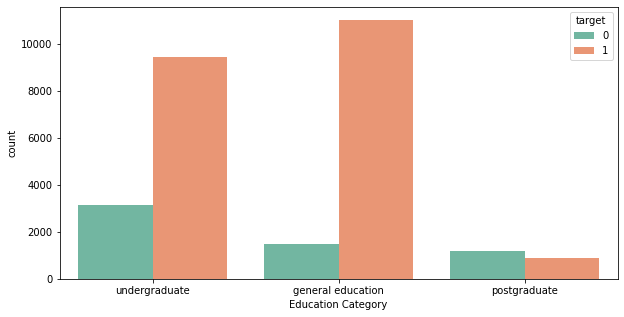

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=training,x='Education Category',hue='target')
plt.show()

In the above chart it is shown how the new feature is correlated with the target.

Usually postgraduate people have high level jobs and their income is much higher than what undergraduate and general education people have.

####**Test Features Extraction**

We will add two features in Test dataset so there will be no confilct in the model

Adding a new feature - Age Category

In [ ]:
test.loc[test['age']<=35,'Age Category']='young'
test.loc[(test['age']>35) & (test['age']<=60),'Age Category']='mature'
test.loc[test['age']>60,'Age Category']='old'

In [ ]:
test.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target,Age Category
14034,27,Without-pay,35034,HS-grad,9,Never-married,Farming-fishing,Own-child,Female,0,0,40,United-States,1,young
3809,77,Local-gov,100883,7th-8th,4,Married-civ-spouse,Other-service,Husband,Male,0,0,8,Canada,1,old
11801,52,Self-emp-not-inc,123727,HS-grad,9,Separated,Exec-managerial,Not-in-family,Male,0,0,60,United-States,1,mature
749,49,Federal-gov,252616,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Male,0,0,40,Philippines,1,mature
9472,46,Private,316271,5th-6th,3,Married-civ-spouse,Craft-repair,Husband,Male,0,0,55,United-States,1,mature


Adding a new feature - Education Category

In [ ]:
test.loc[(test['education']==' 1st-4th')|
             (test['education']==' 5th-6th')|
             (test['education']==' 7th-8th')|
             (test['education']==' 9th')|
             (test['education']==' 10th')|
             (test['education']==' 11th')|
             (test['education']==' 12th')|
             (test['education']==' HS-grad')|
             (test['education']==' Preschool'),'Education Category']='general education'

test.loc[(test['education']==' Bachelors')|
             (test['education']==' Assoc-acdm')|
             (test['education']==' Assoc-voc')|
             (test['education']==' Some-college'),'Education Category']='undergraduate'



test.loc[(test['education']==' Masters')|
             (test['education']==' Prof-school')|
             (test['education']==' Doctorate'),'Education Category']='postgraduate'

In [ ]:
test.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target,Age Category,Education Category
14235,43,Private,57600,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,40,United-States,1,mature,general education
4779,37,Private,224566,Some-college,10,Married-civ-spouse,Tech-support,Husband,Male,0,0,39,United-States,1,mature,undergraduate
82,24,Private,83141,Some-college,10,Separated,Other-service,Not-in-family,Male,0,1876,40,United-States,1,young,undergraduate
10939,45,Self-emp-not-inc,181307,Doctorate,16,Separated,Prof-specialty,Not-in-family,Male,0,1408,40,United-States,1,mature,postgraduate
235,34,Private,147215,Assoc-voc,11,Divorced,Tech-support,Unmarried,Female,0,0,60,United-States,1,young,undergraduate


###**Categorical Encoding (Getting Dummies)**

Here we get the dummy of our data

In [ ]:
training=pd.get_dummies(data=training)
test=pd.get_dummies(data=test)

##**Dataset spliting**

This is the spliting from the given starter code

In [ ]:
# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"]


Here we will check if the given spliting is suitable or not for our models.

Identefing features correlation

In [ ]:
corr=training.corr()


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
extracted_features=pd.Series(corr[(corr['target']>=0.2)|(corr['target']<=-0.2)].index)

In [ ]:
extracted_features

0                                      age
1                            education_num
2                           hours_per_week
3                                   target
4       marital_status_ Married-civ-spouse
5            marital_status_ Never-married
6             ooccupation_ Exec-managerial
7                    relationship_ Husband
8                  relationship_ Own-child
9                              sex_ Female
10                               sex_ Male
11                     Age Category_mature
12                      Age Category_young
13    Education Category_general education
14         Education Category_postgraduate
dtype: object

In [ ]:
X_train=training.loc[:,(extracted_features)]
X_train.drop('target',axis=1,inplace=True)

X_test=test.loc[:,(extracted_features)]
X_test.drop('target',axis=1,inplace=True)

In [ ]:
X_train

,age,education_num,hours_per_week,marital_status_ Married-civ-spouse,marital_status_ Never-married,ooccupation_ Exec-managerial,relationship_ Husband,relationship_ Own-child,sex_ Female,sex_ Male,Age Category_mature,Age Category_young,Education Category_general education,Education Category_postgraduate
0,39,13,40,0,1,0,0,0,0,1,1,0,0,0
1,50,13,13,1,0,1,1,0,0,1,1,0,0,0
2,38,9,40,0,0,0,0,0,0,1,1,0,1,0
3,53,7,40,1,0,0,1,0,0,1,1,0,1,0
4,28,13,40,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,10,40,0,1,0,0,0,0,1,0,1,0,0
32556,27,12,38,1,0,0,0,0,1,0,0,1,0,0
32557,40,9,40,1,0,0,1,0,0,1,1,0,1,0
32558,58,9,40,0,0,0,0,0,1,0,1,0,1,0


#**Data Modeling**

###**Model Selection**

#### Here we will list all models and clarify what type of models is more sutiable for our dataset.

####**Baseline**

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)
baseline_value = y_train.value_counts().index[0]

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds

0        1
1        1
2        1
3        1
4        1
        ..
13560    1
13561    1
13562    1
13563    1
13564    1
Length: 13565, dtype: int64

In [ ]:
bl_acc = accuracy_score(y_test , baseline_preds)
print('BaseLine Accurecy Score = ' , bl_acc)

BaseLine Accurecy Score =  0.7867305565794324


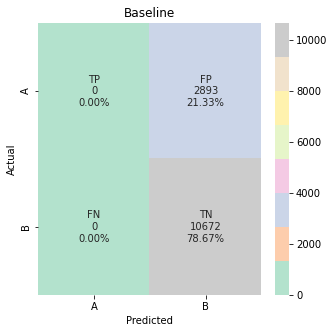

In [ ]:
cf = confusion_matrix(y_test, baseline_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Baseline")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**StandardScaler Model**

In [ ]:
# standrd = StandardScaler()
# training = standrd.fit_transform(training)
# # training

# test = standrd.fit_transform(test)
# # test

####**Logistic Regression Model**

In [ ]:
lr = LogisticRegression(max_iter=10000)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_preds1=lr.predict(X_test)

In [ ]:
lr_acc1 = accuracy_score(y_test, lr_preds1)
print('Logistic Regression Accurecy Score = ' , lr_acc1)

Logistic Regression Accurecy Score =  0.8350165868042757


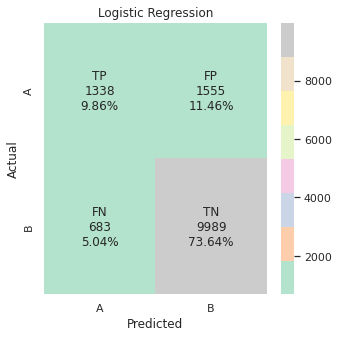

In [ ]:
cf = confusion_matrix(y_test, lr_preds1)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**SGD Classifier Model**

In [ ]:
sgdc = SGDClassifier(max_iter=10000)

In [ ]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_preds1=sgdc.predict(X_test)

In [ ]:
sgd_acc1 = accuracy_score(y_test, sgd_preds1)
print('SGD Classifier Accurecy Score = ' , sgd_acc1)

SGD Classifier Accurecy Score =  0.8071507556210836


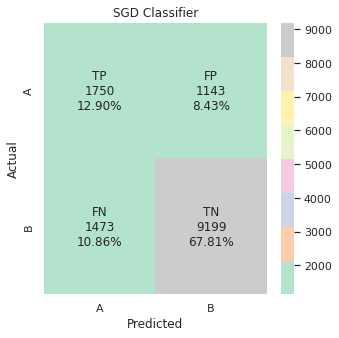

In [ ]:
cf = confusion_matrix(y_test, sgd_preds1)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("SGD Classifier")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**KNeighbors Classifier Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_perds1 = knn.predict(X_test)

In [ ]:
knn_acc1 = accuracy_score(y_test, knn_perds1)
print('KNeighbors Classifier Accurecy Score = ' , knn_acc1)

KNeighbors Classifier Accurecy Score =  0.8075930704017693


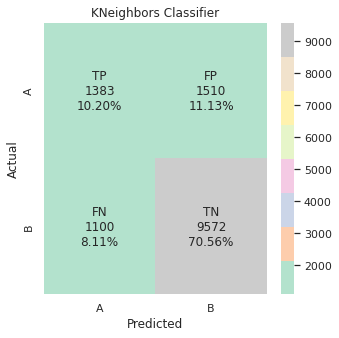

In [ ]:
cf = confusion_matrix(y_test, knn_perds1)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("KNeighbors Classifier")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**Models Acuurecy Cmparisions**

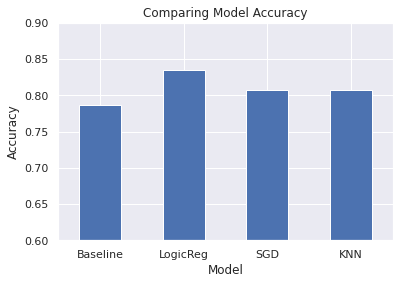

In [ ]:
pd.DataFrame([bl_acc, lr_acc1 , sgd_acc1, knn_acc1]).plot.bar()
plt.xticks(np.arange(4),('Baseline','LogicReg','SGD','KNN'))
plt.legend().remove()
plt.ylim(0.6, 0.9)
plt.annotate = True
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');

**As we can see from the chart,**
- The accurecy score of Baseline Model is

In [ ]:
bl_acc

0.7867305565794324

- And all of our used models socres beated the Baseline score!

In [ ]:
print('Logistic Regression = ' , lr_acc1 ,  '\nSGD = ',sgd_acc1, '\nKNeighbors=', knn_acc1 )

Logistic Regression =  0.8350165868042757 
SGD =  0.8071507556210836 
KNeighbors= 0.8075930704017693


- For our 1st predection, we noticed that the Logistic Regression accurecy score is the highest one.

    So, we assumed that it is the most accurate model to go with but we will test that assumption by doing the optimaization part.

#**Model Optimization**

###**GridSearchCV**

####**Logistic Regression Model**

In [ ]:

p_grid = {'fit_intercept': [True, False],
          'penalty':['l1', 'l2', 'elasticnet'],
          'multi_class':['auto', 'ovr', 'multinomial'],
          'warm_start':[True,False]
          

}

grid = GridSearchCV(lr, p_grid, cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, 

In [ ]:
grid.best_params_

{'fit_intercept': False,
 'multi_class': 'auto',
 'penalty': 'l2',
 'warm_start': True}

In [ ]:
lr = LogisticRegression(max_iter=10000,
                        fit_intercept= False,
                        multi_class='auto',
                        penalty='l2',
                        warm_start= True)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [ ]:
lr_preds2=lr.predict(X_test)

In [ ]:
lr_acc2 = accuracy_score(y_test, lr_preds2)
print('Logistic Regression Accurecy Score After GridSearchCV Optimization = ' , lr_acc2)

Logistic Regression Accurecy Score After GridSearchCV Optimization =  0.8350165868042757


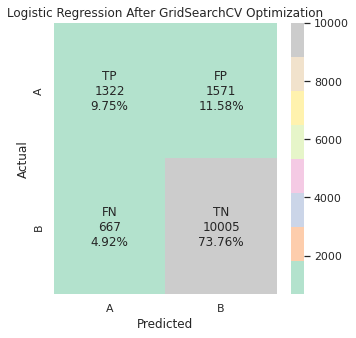

In [ ]:
cf = confusion_matrix(y_test, lr_preds2)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression After GridSearchCV Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**SGD Classifier Model**

In [ ]:
p_grid = {'fit_intercept': [True, False],
          'penalty':['l1', 'l2', 'elasticnet'],
          

}

grid = GridSearchCV(sgdc, p_grid, cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=10000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [ ]:
grid.best_params_

{'fit_intercept': True, 'penalty': 'l1'}

In [ ]:
sgdc = SGDClassifier(max_iter=10000,
                     fit_intercept= False,
                     penalty='elasticnet')

In [ ]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=False,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [ ]:
sgd_preds2=sgdc.predict(X_test)

In [ ]:
sgd_acc2 = accuracy_score(y_test, sgd_preds2)
print('SGD Classifier Accurecy Score After GridSearchCV Optimization = ' , sgd_acc2)

SGD Classifier Accurecy Score After GridSearchCV Optimization =  0.8342056763730188


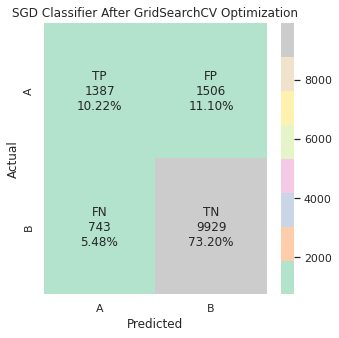

In [ ]:
cf = confusion_matrix(y_test, sgd_preds2)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("SGD Classifier After GridSearchCV Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**KNeighbors Classifier Model**

In [ ]:
p_grid = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(knn, p_grid, cv=10,n_jobs=-1)




In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                       'brute']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'algorithm': 'brute'}

In [ ]:
KNeighborsClassifier(algorithm= 'brute')
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_perds2 = knn.predict(X_test)

In [ ]:
knn_acc2 = accuracy_score(y_test, knn_perds2)
print('KNeighbors Classifier Accurecy Score After GridSearchCV Optimization = ' , knn_acc2)

KNeighbors Classifier Accurecy Score After GridSearchCV Optimization =  0.8075930704017693


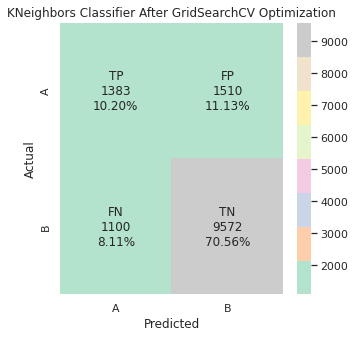

In [ ]:
cf = confusion_matrix(y_test, knn_perds2)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("KNeighbors Classifier After GridSearchCV Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

###**Randomized SearchCV**

####**Logistic Regression Model**

In [ ]:
# parameters
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
# RandomizedSerach Object
clf = RandomizedSearchCV(lr, distributions, cv=7)


In [ ]:
search = clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


In [ ]:
clf.best_params_

{'C': 2.621897559010863, 'penalty': 'l2'}

In [ ]:
# lr = LogisticRegression(max_iter=10000,C= 3.1445359608780548,penalty= 'l2')
lr = LogisticRegression(max_iter=10000,C= 2.737146901722626,penalty= 'l2')

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=2.737146901722626, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
lr_preds=lr.predict(X_test)

In [ ]:
lr_acc = accuracy_score(y_test, lr_preds)
print('Logistic Regression Accurecy Score After Randomized SearchCV Optimization = ' , lr_acc)

Logistic Regression Accurecy Score After Randomized SearchCV Optimization =  0.8349428676741615


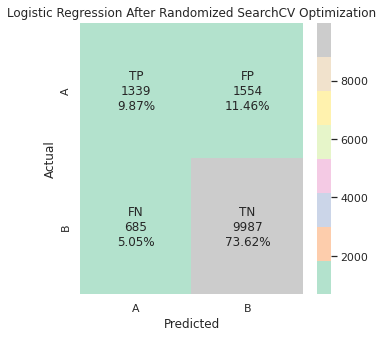

In [ ]:
cf = confusion_matrix(y_test, lr_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression After Randomized SearchCV Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**SGD Classifier Model**

In [ ]:
# parameters
distributions = dict(fit_intercept=[True, False], penalty=['l1', 'l2', 'elasticnet'])
# RandomizedSerach Object
clf = RandomizedSearchCV(sgdc, distributions, cv=7)

In [ ]:
search = clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
clf.best_params_

{'fit_intercept': False, 'penalty': 'l1'}

In [ ]:
sgdc = SGDClassifier(max_iter=10000,
                     fit_intercept=True,
                     penalty='elasticnet')

In [ ]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [ ]:
sgd_preds=sgdc.predict(X_test)

In [ ]:
sgd_acc = accuracy_score(y_test, sgd_preds)
print('SGD Classifier Accurecy Score After Randomized SearchCV Optimization = ' , sgd_acc)

SGD Classifier Accurecy Score After Randomized SearchCV Optimization =  0.8191669738297088


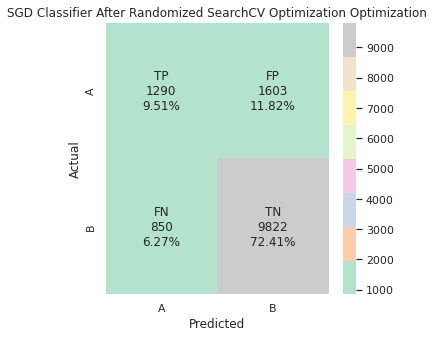

In [ ]:
cf = confusion_matrix(y_test, sgd_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("SGD Classifier After Randomized SearchCV Optimization Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####**KNeighbors Classifier Model**

In [ ]:
# parameters
distributions = dict(n_neighbors=[1,2,3,4,5], algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])
# RandomizedSerach Object
clf = RandomizedSearchCV(knn, distributions, cv=7)

In [ ]:
search = clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

{'algorithm': 'brute', 'n_neighbors': 5}

In [ ]:
KNeighborsClassifier(algorithm= 'brute', n_neighbors= 5)
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_perds = knn.predict(X_test)

In [ ]:
knn_acc = accuracy_score(y_test, knn_perds)
print('KNeighbors Classifier Accurecy Score After Randomized SearchCV Optimization = ' , knn_acc)

KNeighbors Classifier Accurecy Score After Randomized SearchCV Optimization =  0.8075930704017693


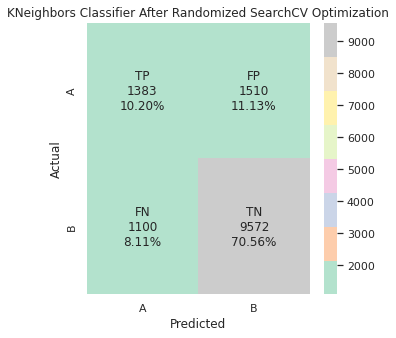

In [ ]:
cf = confusion_matrix(y_test, knn_perds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("KNeighbors Classifier After Randomized SearchCV Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

##**Model Determination**

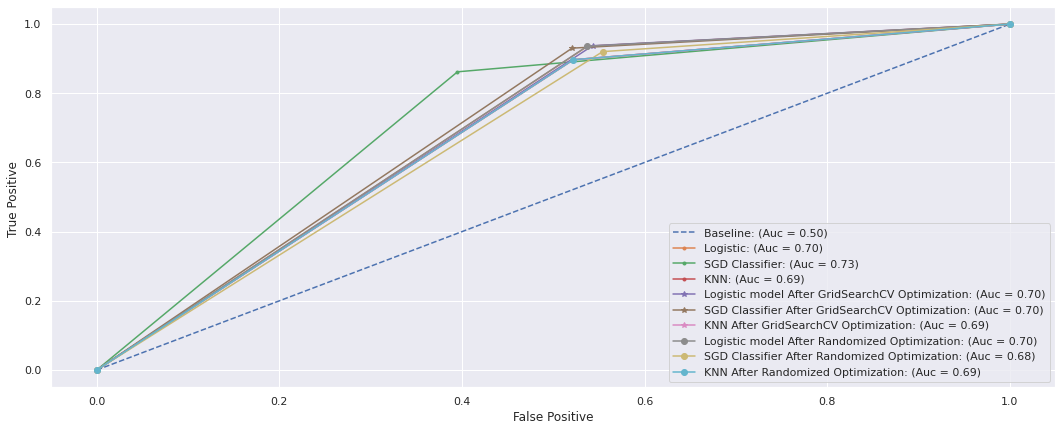

In [ ]:
# calculate roc curves
bl_x, bl_y, _ = roc_curve(y_test, baseline_preds )

lr_x1, lr_y1, _ = roc_curve(y_test, lr_preds1)
sgd_x1, sgd_y1, _ = roc_curve(y_test, sgd_preds1)
knn_x1, knn_y1, _ = roc_curve(y_test, knn_perds1)

lr_x2, lr_y2, _ = roc_curve(y_test, lr_preds2)
sgd_x2, sgd_y2, _ = roc_curve(y_test, sgd_preds2)
knn_x2, knn_y2, _ = roc_curve(y_test, knn_perds2)

lr_x3, lr_y3, _ = roc_curve(y_test, lr_preds)
sgd_x3, sgd_y3, _ = roc_curve(y_test, sgd_preds)
knn_x3, knn_y3, _ = roc_curve(y_test, knn_perds)
# area under the curve
bl_auc = auc(bl_x , bl_y)

lr_auc1 = auc(lr_x1 , lr_y1)
lr_g_auc1 = auc(sgd_x1 , sgd_y1)
knn_auc1 = auc(knn_x1, knn_y1)

lr_auc2 = auc(lr_x2 , lr_y2)
lr_g_auc2 = auc(sgd_x2 , sgd_y2)
knn_auc2 = auc(knn_x2, knn_y2)

lr_auc = auc(lr_x3 , lr_y3)
lr_g_auc = auc(sgd_x3 , sgd_y3)
knn_auc = auc(knn_x3, knn_y3)



# plot the roc curve for the model
plt.figure(figsize=(18,7))
plt.plot(bl_x, bl_y, linestyle='--', label='Baseline: (Auc = %0.2f)' % bl_auc)

plt.plot(lr_x1, lr_y1, marker='.', label='Logistic: (Auc = %0.2f)' % lr_auc1)
plt.plot(sgd_x1, sgd_y1, marker='.', label='SGD Classifier: (Auc = %0.2f)' % lr_g_auc1)
plt.plot(knn_x1, knn_y1, marker='.', label='KNN: (Auc = %0.2f)' % knn_auc1)

plt.plot(lr_x2, lr_y2, marker='*', label='Logistic model After GridSearchCV Optimization: (Auc = %0.2f)' % lr_auc2)
plt.plot(sgd_x2, sgd_y2, marker='*', label='SGD Classifier After GridSearchCV Optimization: (Auc = %0.2f)' % lr_g_auc2)
plt.plot(knn_x2, knn_y2, marker='*', label='KNN After GridSearchCV Optimization: (Auc = %0.2f)' % knn_auc2)

plt.plot(lr_x3, lr_y3, marker="o", label='Logistic model After Randomized Optimization: (Auc = %0.2f)' % lr_auc)
plt.plot(sgd_x3, sgd_y3, marker="o", label='SGD Classifier After Randomized Optimization: (Auc = %0.2f)' % lr_g_auc)
plt.plot(knn_x3, knn_y3, marker="o", label='KNN After Randomized Optimization: (Auc = %0.2f)' % knn_auc)

# axis labels
plt.xlabel('False Positive')
plt.ylabel('True Positive ')
# legend
plt.legend();

Type your finding
which model you would select ? and Why?


In [ ]:

best_score= {'baseline model':bl_acc,
                 'Logistic model':lr_acc1,
                 'SGD Classifier model':sgd_acc1,
                 'KNN model':knn_acc1,
                 'Logistic model After GridSearchCV Optimization':lr_acc2,
                 'SGD Classifier model After GridSearchCV Optimization':sgd_acc2,
                 'KNN model After GridSearchCV Optimization':knn_acc2,
                 'Logistic model After Randomized Optimization':lr_acc,
                 'SGD Classifier model After Randomized Optimization':sgd_acc,
                 'KNN model After Randomized Optimization':knn_acc}

In [ ]:
max_key = max(best_score, key=best_score.get)
max_value =best_score[max_key]

In [ ]:
print(f'As seen in the above scores tests, we select {max_key} with an accuracy score:{max_value}')

As seen in the above scores tests, we select Logistic model with an accuracy score:0.8350165868042757
